# 评估同化算法的性能


In [1]:
%load_ext autoreload
%autoreload 2

## 基本参数设置

In [2]:
# Depending on your combination of package versions, this can raise a lot of TF warnings... 
import numpy as np
import matplotlib.pyplot as plt
# import scienceplots
plt.style.use(["nature", "no-latex"])
import xarray as xr
from pathlib import Path
import pickle
import sys 
sys.path.append('../')

In [3]:
fourcastnet_dir = "/public/home/wangwuxing01/research/fundation/output/forecast"

In [4]:
plot_vars = ["Z500", "T850", "T2M", "U10", "V10", "MSLP", "T500", "R500", "U500", "V500"]
unit_y = ["(m$^2$ s$^{-2}$)", "(K)", "(K)", "(m s$^{-1}$)", "(m s$^{-1}$)", "(Pa)", "(K)", "(%)", "(m s$^{-1}$)", "(m s$^{-1}$)"]
plot_idx = [1, 10, 22, 20, 21, 23, 9, 5, 13, 17]

In [5]:
rmse_fourcastnet = np.load(f"{fourcastnet_dir}/rmse_fourcastnet.npy")
acc_fourcastnet = np.load(f"{fourcastnet_dir}/acc_fourcastnet.npy")

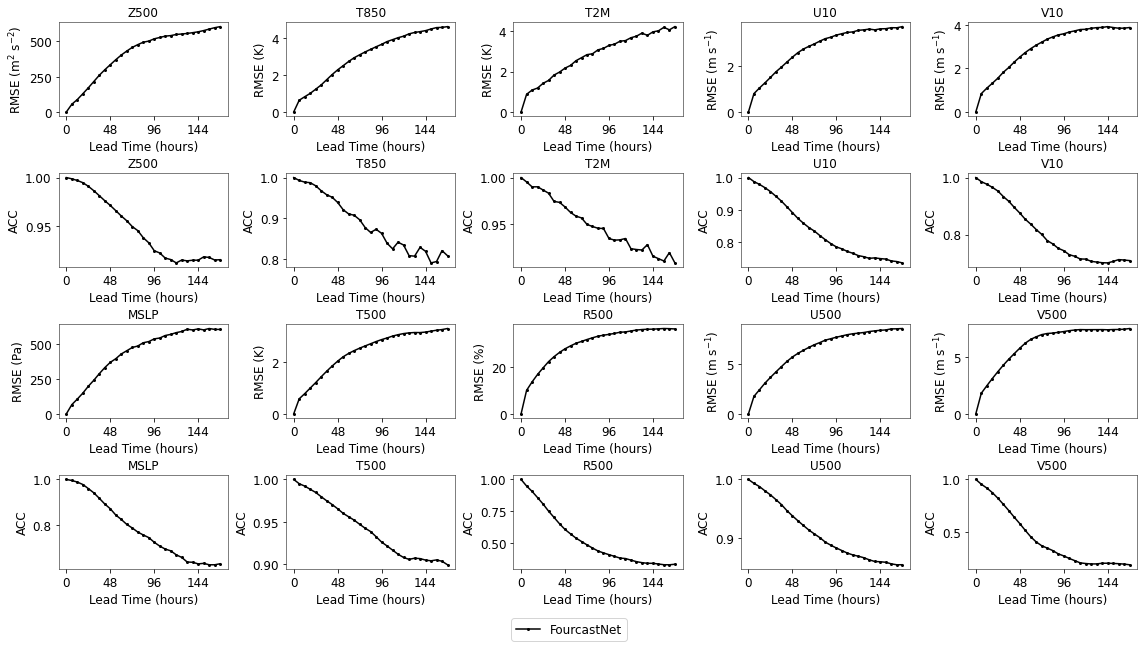

In [6]:
fig = plt.figure(figsize=(16, 9))
for i in range(20):
    ax = fig.add_subplot(4, 5, i+1)
    if i in [0, 1, 2, 3, 4]:
        plt.title(plot_vars[i], fontsize=12)
        ax.plot(np.mean(rmse_fourcastnet, axis=0)[:, plot_idx[i]], color='k', linewidth=1.5, 
                marker="o", markersize=2, label=f"FourcastNet")
        ax.set_xticks(np.arange(0, rmse_fourcastnet.shape[1], 8))
        ax.set_xticklabels(np.arange(0, 6 * rmse_fourcastnet.shape[1], 48), fontsize=12)
        ax.tick_params(axis="y", labelsize=12)
        plt.ylabel(f"RMSE {unit_y[i]}", fontsize=12)
        plt.xlabel("Lead Time (hours)", fontsize=12)
    elif i in [5, 6, 7, 8, 9]:
        plt.title(plot_vars[i-5], fontsize=12)
        ax.plot(np.mean(acc_fourcastnet, axis=0)[:, plot_idx[i-5]], color='k', linewidth=1.5, 
                marker="o", markersize=2, label=f"FourcastNet")
        ax.set_xticks(np.arange(0, acc_fourcastnet.shape[1], 8))
        ax.set_xticklabels(np.arange(0, 6 * acc_fourcastnet.shape[1], 48), fontsize=12)
        ax.tick_params(axis="y", labelsize=12)
        plt.ylabel(f"ACC", fontsize=12)
        plt.xlabel("Lead Time (hours)", fontsize=12)
    elif i in [10, 11, 12, 13, 14]:
        plt.title(plot_vars[i-5], fontsize=12)
        ax.plot(np.mean(rmse_fourcastnet, axis=0)[:, plot_idx[i-5]], color='k', linewidth=1.5, 
                marker="o", markersize=2, label=f"FourcastNet")
        ax.set_xticks(np.arange(0, rmse_fourcastnet.shape[1], 8))
        ax.set_xticklabels(np.arange(0, 6 * rmse_fourcastnet.shape[1], 48), fontsize=12)
        ax.tick_params(axis="y", labelsize=12)
        plt.ylabel(f"RMSE {unit_y[i-5]}", fontsize=12)
        plt.xlabel("Lead Time (hours)", fontsize=12)
    elif i in [15, 16, 17, 18, 19]:
        plt.title(plot_vars[i-10], fontsize=12)
        ax.plot(np.mean(acc_fourcastnet, axis=0)[:, plot_idx[i-10]], color='k', linewidth=1.5, 
                marker="o", markersize=2, label=f"FourcastNet")
        ax.set_xticks(np.arange(0, acc_fourcastnet.shape[1], 8))
        ax.set_xticklabels(np.arange(0, 6 * acc_fourcastnet.shape[1], 48), fontsize=12)
        ax.tick_params(axis="y", labelsize=12)
        plt.ylabel(f"ACC", fontsize=12)
        plt.xlabel("Lead Time (hours)", fontsize=12)
        
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, ncol=1, loc='lower center', bbox_to_anchor=(0.5, 0), fontsize=12)
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.12)
plt.savefig(f'fourcastnet_medium_forecast.jpg',dpi=300)
plt.savefig(f'fourcastnet_medium_forecast.pdf',dpi=300)
plt.show()

In [7]:
da_cycle_dir = "/public/home/wangwuxing01/research/fundation/output_npj/da_cycle"
medium_forecast_dir = "/public/home/wangwuxing01/research/fundation/output_npj/medium_forecast"
scaler_dir = "/public/home/wangwuxing01/research/fundation/data/era5_6_hourly/assim_dir_3day/scaler.pkl"
var_idx_dir = "/public/home/wangwuxing01/research/fundation/data/era5_6_hourly/assim_dir_3day/var_idx.npy"

In [8]:
var_idx = [k for k in np.load(var_idx_dir)]

In [14]:
plot_vars = ["Z500", "T850", "T2M", "U10", "V10", "MSLP", "T500", "R500", "U500", "V500"]
unit_y = ["(m$^2$ s$^{-2}$)", "(K)", "(K)", "(m s$^{-1}$)", "(m s$^{-1}$)", "(Pa)", "(K)", "(%)", "(m s$^{-1}$)", "(m s$^{-1}$)"]
plot_idx = [1, 10, 22, 20, 21, 23, 9, 5, 13, 17]

In [15]:
rmse_dacycle_4dvarformer_daw24 = np.load(f"{da_cycle_dir}/rmse_4dvarformer_obs[8, 9, 10, 11, 20, 21]_num4_xb_3day.npy").astype(np.float32)
rmse_dacycle_4dvarformer_daw18 = np.load(f"{da_cycle_dir}/rmse_4dvarformer_obs[8, 9, 10, 11, 20, 21]_num3_xb_3day.npy").astype(np.float32)
rmse_dacycle_4dvarformer_daw12 = np.load(f"{da_cycle_dir}/rmse_4dvarformer_obs[8, 9, 10, 11, 20, 21]_num2_xb_3day.npy").astype(np.float32)
rmse_dacycle_4dvarformer_daw6 = np.load(f"{da_cycle_dir}/rmse_4dvarformer_obs[8, 9, 10, 11, 20, 21]_num1_xb_3day.npy").astype(np.float32)

acc_dacycle_4dvarformer_daw24 = np.load(f"{da_cycle_dir}/acc_4dvarformer_obs[8, 9, 10, 11, 20, 21]_num4_xb_3day.npy").astype(np.float32)
acc_dacycle_4dvarformer_daw18 = np.load(f"{da_cycle_dir}/acc_4dvarformer_obs[8, 9, 10, 11, 20, 21]_num3_xb_3day.npy").astype(np.float32)
acc_dacycle_4dvarformer_daw12 = np.load(f"{da_cycle_dir}/acc_4dvarformer_obs[8, 9, 10, 11, 20, 21]_num2_xb_3day.npy").astype(np.float32)
acc_dacycle_4dvarformer_daw6 = np.load(f"{da_cycle_dir}/acc_4dvarformer_obs[8, 9, 10, 11, 20, 21]_num1_xb_3day.npy").astype(np.float32)

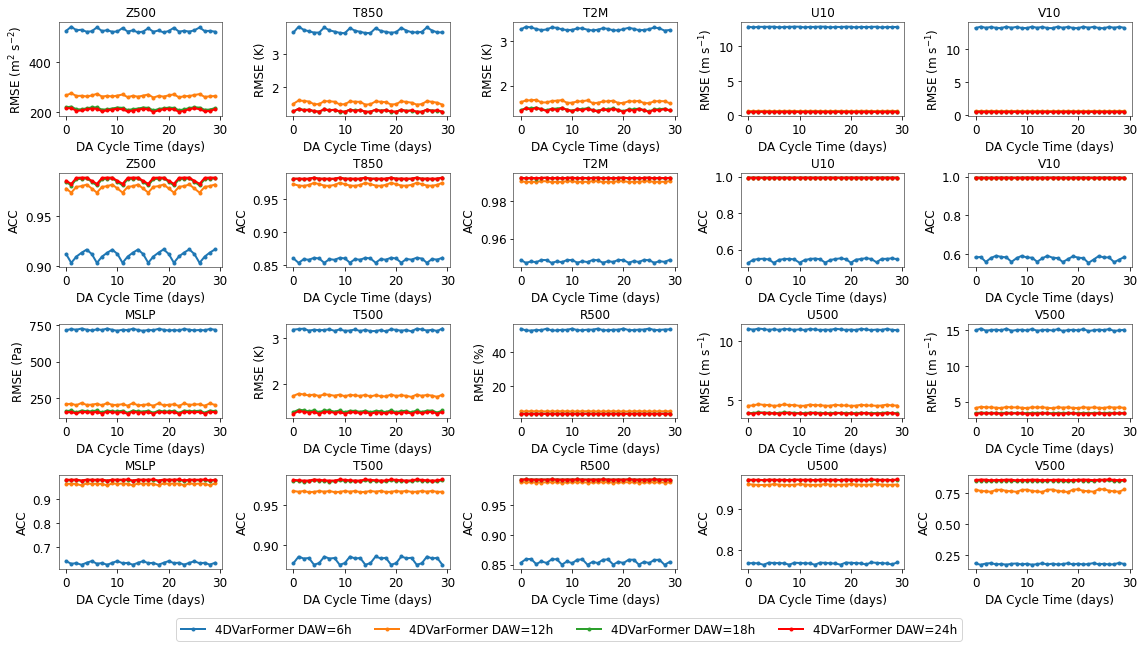

In [16]:
fig = plt.figure(figsize=(16, 9))
for i in range(20):
    ax = fig.add_subplot(4, 5, i+1)
    if i in [0, 1, 2, 3, 4]:
        plt.title(plot_vars[i], fontsize=12)
        ax.plot(np.mean(rmse_dacycle_4dvarformer_daw6, axis=0)[::4, plot_idx[i]], 
                linewidth=2, marker="o", markersize=3, label=f"4DVarFormer DAW=6h")
        ax.plot(np.mean(rmse_dacycle_4dvarformer_daw12, axis=0)[::4, plot_idx[i]], 
                linewidth=2, marker="o", markersize=3, label=f"4DVarFormer DAW=12h")
        ax.plot(np.mean(rmse_dacycle_4dvarformer_daw18, axis=0)[::4, plot_idx[i]], linewidth=2, 
                marker="o", markersize=3, label=f"4DVarFormer DAW=18h")
        ax.plot(np.mean(rmse_dacycle_4dvarformer_daw24, axis=0)[::4, plot_idx[i]], linewidth=2, color='r',
                marker="o", markersize=3, label=f"4DVarFormer DAW=24h")
        ax.tick_params(axis="x", labelsize=12)
        ax.tick_params(axis="y", labelsize=12)
        plt.ylabel(f"RMSE {unit_y[i]}", fontsize=12)
        plt.xlabel("DA Cycle Time (days)", fontsize=12)
    elif i in [5, 6, 7, 8, 9]:
        plt.title(plot_vars[i-5], fontsize=12)
        ax.plot(np.mean(acc_dacycle_4dvarformer_daw6, axis=0)[::4, plot_idx[i-5]], linewidth=2, 
                marker="o", markersize=3, label=f"4DVarFormer DAW=6h")
        ax.plot(np.mean(acc_dacycle_4dvarformer_daw12, axis=0)[::4, plot_idx[i-5]], linewidth=2, 
                marker="o", markersize=3, label=f"4DVarFormer DAW=12h")
        ax.plot(np.mean(acc_dacycle_4dvarformer_daw18, axis=0)[::4, plot_idx[i-5]], linewidth=2, 
                marker="o", markersize=3, label=f"4DVarFormer DAW=18h")
        ax.plot(np.mean(acc_dacycle_4dvarformer_daw24, axis=0)[::4, plot_idx[i-5]], color='r', linewidth=2, 
                marker="o", markersize=3, label=f"4DVarFormer DAW=24h")
        ax.tick_params(axis="x", labelsize=12)
        ax.tick_params(axis="y", labelsize=12)
        plt.ylabel(f"ACC", fontsize=12)
        plt.xlabel("DA Cycle Time (days)", fontsize=12)
    elif i in [10, 11, 12, 13, 14]:
        plt.title(plot_vars[i-5], fontsize=12)
        ax.plot(np.mean(rmse_dacycle_4dvarformer_daw6, axis=0)[::4, plot_idx[i-5]], linewidth=2, 
                marker="o", markersize=3, label=f"4DVarFormer DAW=6h")
        ax.plot(np.mean(rmse_dacycle_4dvarformer_daw12, axis=0)[::4, plot_idx[i-5]], linewidth=2, 
                marker="o", markersize=3, label=f"4DVarFormer DAW=12h")
        ax.plot(np.mean(rmse_dacycle_4dvarformer_daw18, axis=0)[::4, plot_idx[i-5]], linewidth=2, 
                marker="o", markersize=3, label=f"4DVarFormer DAW=18h")
        ax.plot(np.mean(rmse_dacycle_4dvarformer_daw24, axis=0)[::4, plot_idx[i-5]], color='r', linewidth=2, 
                marker="o", markersize=3, label=f"4DVarFormer DAW=24h")
        ax.tick_params(axis="x", labelsize=12)
        ax.tick_params(axis="y", labelsize=12)
        plt.ylabel(f"RMSE {unit_y[i-5]}", fontsize=12)
        plt.xlabel("DA Cycle Time (days)", fontsize=12)
    elif i in [15, 16, 17, 18, 19]:
        plt.title(plot_vars[i-10], fontsize=12)
        ax.plot(np.mean(acc_dacycle_4dvarformer_daw6, axis=0)[::4, plot_idx[i-10]], linewidth=2, 
                marker="o", markersize=3, label=f"4DVarFormer DAW=6h")
        ax.plot(np.mean(acc_dacycle_4dvarformer_daw12, axis=0)[::4, plot_idx[i-10]], linewidth=2, 
                marker="o", markersize=3, label=f"4DVarFormer DAW=12h")
        ax.plot(np.mean(acc_dacycle_4dvarformer_daw18, axis=0)[::4, plot_idx[i-10]], linewidth=2, 
                marker="o", markersize=3, label=f"4DVarFormer DAW=18h")
        ax.plot(np.mean(acc_dacycle_4dvarformer_daw24, axis=0)[::4, plot_idx[i-10]], color='r', linewidth=2, 
                marker="o", markersize=3, label=f"4DVarFormer DAW=24h")
        ax.tick_params(axis="x", labelsize=12)
        ax.tick_params(axis="y", labelsize=12)
        plt.ylabel(f"ACC", fontsize=12)
        plt.xlabel("DA Cycle Time (days)", fontsize=12)
        
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, ncol=4, loc='lower center', bbox_to_anchor=(0.5, 0), fontsize=12)
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.12)
plt.savefig(f'da_cycle_temp_wind_diffobsnum.jpg',dpi=300)
plt.savefig(f'da_cycle_temp_wind_diffobsnum.pdf',dpi=300)
plt.show()

In [17]:
rmse_fourcastnet = np.load(f"{fourcastnet_dir}/rmse_fourcastnet.npy").astype(np.float32)
rmse_mf_4dvarformer_daw24 = np.load(f"{medium_forecast_dir}/rmse_4dvarformer_obs[8, 9, 10, 11, 20, 21]_num4_xb_3day.npy").astype(np.float32)
rmse_mf_4dvarformer_daw18 = np.load(f"{medium_forecast_dir}/rmse_4dvarformer_obs[8, 9, 10, 11, 20, 21]_num3_xb_3day.npy").astype(np.float32)
rmse_mf_4dvarformer_daw12 = np.load(f"{medium_forecast_dir}/rmse_4dvarformer_obs[8, 9, 10, 11, 20, 21]_num2_xb_3day.npy").astype(np.float32)
rmse_mf_4dvarformer_daw6 = np.load(f"{medium_forecast_dir}/rmse_4dvarformer_obs[8, 9, 10, 11, 20, 21]_num1_xb_3day.npy").astype(np.float32)

acc_fourcastnet = np.load(f"{fourcastnet_dir}/acc_fourcastnet.npy").astype(np.float32)
acc_mf_4dvarformer_daw24 = np.load(f"{medium_forecast_dir}/acc_4dvarformer_obs[8, 9, 10, 11, 20, 21]_num4_xb_3day.npy").astype(np.float32)
acc_mf_4dvarformer_daw18 = np.load(f"{medium_forecast_dir}/acc_4dvarformer_obs[8, 9, 10, 11, 20, 21]_num3_xb_3day.npy").astype(np.float32)
acc_mf_4dvarformer_daw12 = np.load(f"{medium_forecast_dir}/acc_4dvarformer_obs[8, 9, 10, 11, 20, 21]_num2_xb_3day.npy").astype(np.float32)
acc_mf_4dvarformer_daw6 = np.load(f"{medium_forecast_dir}/acc_4dvarformer_obs[8, 9, 10, 11, 20, 21]_num1_xb_3day.npy").astype(np.float32)

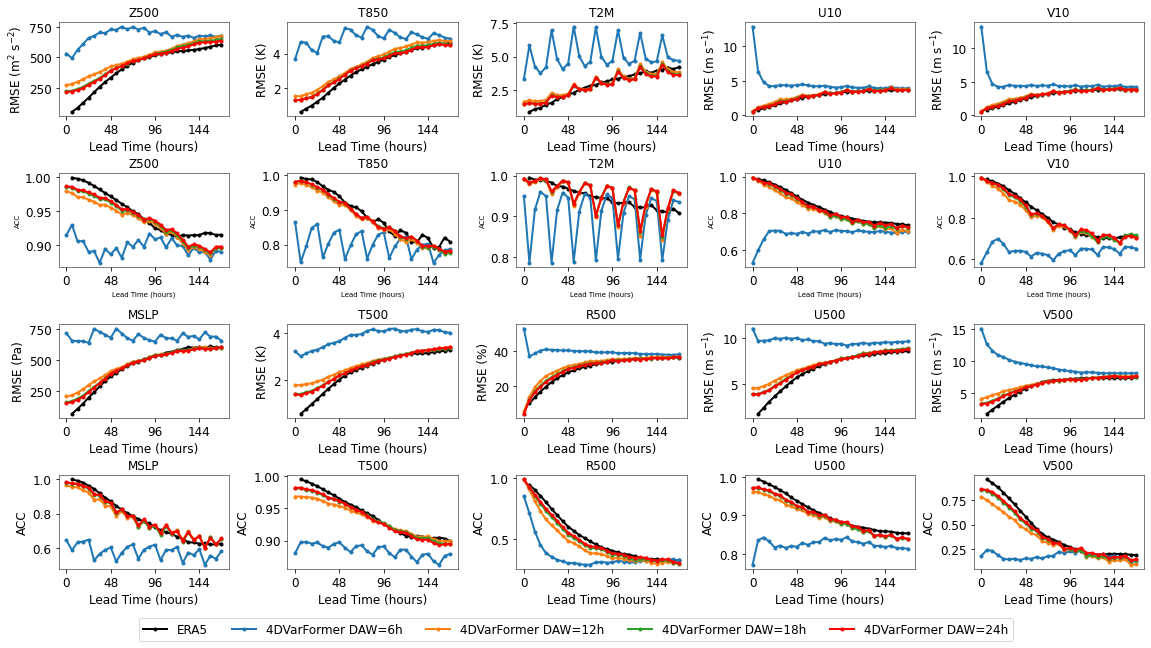

In [18]:
fig = plt.figure(figsize=(16, 9))
for i in range(20):
    ax = fig.add_subplot(4, 5, i+1)
    if i in [0, 1, 2, 3, 4]:
        plt.title(plot_vars[i], fontsize=12)
        ax.plot(np.arange(1, 29), np.mean(rmse_fourcastnet, axis=0)[1:, plot_idx[i]], color='k', linewidth=2,
                marker="o", markersize=3, label=f"ERA5")
        ax.plot(np.mean(rmse_mf_4dvarformer_daw6, axis=0)[:, plot_idx[i]], linewidth=2,
                marker="o", markersize=3,  label=f"4DVarFormer DAW=6h")
        ax.plot(np.mean(rmse_mf_4dvarformer_daw12, axis=0)[:, plot_idx[i]], linewidth=2,
                marker="o", markersize=3, label=f"4DVarFormer DAW=12h")
        ax.plot(np.mean(rmse_mf_4dvarformer_daw18, axis=0)[:, plot_idx[i]], linewidth=2,
                marker="o", markersize=3, label=f"4DVarFormer DAW=18h")
        ax.plot(np.mean(rmse_mf_4dvarformer_daw24, axis=0)[:, plot_idx[i]], color='r', linewidth=2,
                marker="o", markersize=3, label=f"4DVarFormer DAW=24h")
        ax.set_xticks(np.arange(0, rmse_fourcastnet.shape[1], 8))
        ax.set_xticklabels(np.arange(0, 6 * rmse_fourcastnet.shape[1], 48))
        ax.tick_params(axis="x", labelsize=12)
        ax.tick_params(axis="y", labelsize=12)
        plt.ylabel(f"RMSE {unit_y[i]}", fontsize=12)
        plt.xlabel("Lead Time (hours)", fontsize=12)
    elif i in [5, 6, 7, 8, 9]:
        plt.title(plot_vars[i-5], fontsize=12)
        ax.plot(np.arange(1, 29), np.mean(acc_fourcastnet, axis=0)[1:, plot_idx[i-5]], color='k', linewidth=2,
                marker="o", markersize=3, label=f"ERA5")
        ax.plot(np.mean(acc_mf_4dvarformer_daw6, axis=0)[:, plot_idx[i-5]], linewidth=2,
                marker="o", markersize=3,  label=f"4DVarFormer DAW=6h")
        ax.plot(np.mean(acc_mf_4dvarformer_daw12, axis=0)[:, plot_idx[i-5]], linewidth=2,
                marker="o", markersize=3, label=f"4DVarFormer DAW=12h")
        ax.plot(np.mean(acc_mf_4dvarformer_daw18, axis=0)[:, plot_idx[i-5]], linewidth=2,
                marker="o", markersize=3, label=f"4DVarFormer DAW=18h")
        ax.plot(np.mean(acc_mf_4dvarformer_daw24, axis=0)[:, plot_idx[i-5]], color='r', linewidth=2,
                marker="o", markersize=3, label=f"4DVarFormer DAW=24h")
        ax.set_xticks(np.arange(0, acc_fourcastnet.shape[1], 8))
        ax.set_xticklabels(np.arange(0, 6 * acc_fourcastnet.shape[1], 48))
        ax.tick_params(axis="x", labelsize=12)
        ax.tick_params(axis="y", labelsize=12)
        plt.ylabel(f"ACC")
        plt.xlabel("Lead Time (hours)")
    elif i in [10, 11, 12, 13, 14]:
        plt.title(plot_vars[i-5], fontsize=12)
        ax.plot(np.arange(1, 29), np.mean(rmse_fourcastnet, axis=0)[1:, plot_idx[i-5]], color='k', linewidth=2,
                marker="o", markersize=3, label=f"ERA5")
        ax.plot(np.mean(rmse_mf_4dvarformer_daw6, axis=0)[:, plot_idx[i-5]], linewidth=2,
                marker="o", markersize=3,  label=f"4DVarFormer DAW=6h")
        ax.plot(np.mean(rmse_mf_4dvarformer_daw12, axis=0)[:, plot_idx[i-5]], linewidth=2,
                marker="o", markersize=3, label=f"4DVarFormer DAW=12h")
        ax.plot(np.mean(rmse_mf_4dvarformer_daw18, axis=0)[:, plot_idx[i-5]], linewidth=2,
                marker="o", markersize=3, label=f"4DVarFormer DAW=18h")
        ax.plot(np.mean(rmse_mf_4dvarformer_daw24, axis=0)[:, plot_idx[i-5]], color='r', linewidth=2,
                marker="o", markersize=3, label=f"4DVarFormer DAW=24h")
        ax.set_xticks(np.arange(0, rmse_fourcastnet.shape[1], 8))
        ax.set_xticklabels(np.arange(0, 6 * rmse_fourcastnet.shape[1], 48))
        ax.tick_params(axis="x", labelsize=12)
        ax.tick_params(axis="y", labelsize=12)
        plt.ylabel(f"RMSE {unit_y[i-5]}", fontsize=12)
        plt.xlabel("Lead Time (hours)", fontsize=12)
    elif i in [15, 16, 17, 18, 19]:
        plt.title(plot_vars[i-10], fontsize=12)
        ax.plot(np.arange(1, 29), np.mean(acc_fourcastnet, axis=0)[1:, plot_idx[i-10]], color='k', linewidth=2,
                marker="o", markersize=3, label=f"ERA5")
        ax.plot(np.mean(acc_mf_4dvarformer_daw6, axis=0)[:, plot_idx[i-10]], linewidth=2,
                marker="o", markersize=3,  label=f"4DVarFormer DAW=6h")
        ax.plot(np.mean(acc_mf_4dvarformer_daw12, axis=0)[:, plot_idx[i-10]], linewidth=2,
                marker="o", markersize=3, label=f"4DVarFormer DAW=12h")
        ax.plot(np.mean(acc_mf_4dvarformer_daw18, axis=0)[:, plot_idx[i-10]], linewidth=2,
                marker="o", markersize=3, label=f"4DVarFormer DAW=18h")
        ax.plot(np.mean(acc_mf_4dvarformer_daw24, axis=0)[:, plot_idx[i-10]], color='r', linewidth=2,
                marker="o", markersize=3, label=f"4DVarFormer DAW=24h")
        ax.set_xticks(np.arange(0, acc_fourcastnet.shape[1], 8))
        ax.set_xticklabels(np.arange(0, 6 * acc_fourcastnet.shape[1], 48))
        ax.tick_params(axis="x", labelsize=12)
        ax.tick_params(axis="y", labelsize=12)
        plt.ylabel(f"ACC", fontsize=12)
        plt.xlabel("Lead Time (hours)", fontsize=12)
        
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, ncol=5, loc='lower center', bbox_to_anchor=(0.5, 0), fontsize=12)
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.12)
plt.savefig(f'medium_forecast_temp_wind_diffobsnum.jpg', dpi=300)
plt.savefig(f'medium_forecast_temp_wind_diffobsnum.pdf', dpi=300)
plt.show()